**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 1

**Datos de la entrega:** Lunes 25 de setiembre 2023, a más tardar a las 11:59 pm

**Estudiantes:**
- Máximo Agrazal Quirós
- Celina Madrigal Murillo






# Parte 1.  Series temporales y graficación  (65 puntos)

1. Se adjuntan un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie los capítulos en el PDF, se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo la serie temporal en el archivo: TS_d_1, realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.
1. Considere que el código ejemplo en el PDF podría requerir algún pequeño cambio por un tema de versiones de la biblioteca en el tiempo.


In [20]:
#Importación de bibliotecas
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1.1
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [21]:
series = pd.read_csv('TS_d_1.csv', header = 0, parse_dates=['fecha'], index_col=0) #Carga el archivo e indica que la columna 0 deberia ser tratada como fechas
print(series.head()) #Imprime las primeras 5 filas
print(type(series)) #Imprime el tipo de dato de la variable series

          temperatura
fecha                
1/1/2004          5.3
2/1/2004          5.6
3/1/2004          5.9
4/1/2004          6.2
5/1/2004          8.4
<class 'pandas.core.frame.DataFrame'>


### 1.2
- Muestra el promedio, la mediana y la desviación estándar de los datos

In [22]:
#Imprime un resumen de las estadisticas de la variable series incluyendo el promedio, la mediana y la desviación estándar
#mean = promedio
#std = desviación estándar
#50% = mediana 
print(series.describe())

       temperatura
count  4749.000000
mean      8.013887
std       3.863948
min       1.570000
25%       5.020000
50%       7.400000
75%       9.460000
max      24.200000


### 1.3
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, luego el promedio para todos los febreros, y así sucevivamente.

In [23]:
from pandas import DataFrame

series = series.reset_index() #Resetea el índice por si no está en formato de fecha
series['fecha'] = pd.to_datetime(series['fecha'], format = '%d/%m/%Y') #Convierte los valores en la columna 'fecha' a objetos de fecha y hora
promedio_por_mes = series.groupby(series['fecha'].dt.month)['temperatura'].mean() #Calcula el promedio por mes
print(promedio_por_mes) #Imprime los promedios


fecha
1     7.688139
2     7.735815
3     7.874268
4     8.524821
5     8.221762
6     7.273333
7     7.706328
8     8.226898
9     8.821692
10    8.498586
11    7.806769
12    7.776055
Name: temperatura, dtype: float64


### 1.4 
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=5

In [24]:
from pandas import concat

temps = DataFrame(series['temperatura'].values) #Crea un DataFrame a partir de los valores de la columna 'temperatura' de 'series'
dataframe = concat([temps.shift(5), temps.shift(4),temps.shift(3), temps.shift(2),temps.shift(1), temps], axis=1) #Concatena las columnas
dataframe.columns = ['t-4', 't-3', 't-2', 't-1','t','t+1'] #Renombra las columnas para representar los diferentes pasos del tiempo
print(dataframe.head(5)) #Imprime las primeras 5 filas del DataFrame

   t-4  t-3  t-2  t-1    t  t+1
0  NaN  NaN  NaN  NaN  NaN  5.3
1  NaN  NaN  NaN  NaN  5.3  5.6
2  NaN  NaN  NaN  5.3  5.6  5.9
3  NaN  NaN  5.3  5.6  5.9  6.2
4  NaN  5.3  5.6  5.9  6.2  8.4


### 1.5
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 3. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [25]:
shifted = temps.shift(1) #Toma temps y los desplaza en una posición hacia abajo
window = shifted.rolling(window=3) #Crea una ventana deslizante de tamaño 3
means = window.mean() #Calcula la media
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1) #Concatena la información
dataframe.columns = ['mínimo', 'media', 'máximo', 't+1'] #Renombra las columnas
print(dataframe.head(5)) #Imprime las primeras 5 filas del DataFrame

   mínimo  media  máximo  t+1
0     NaN    NaN     NaN  5.3
1     NaN    NaN     NaN  5.6
2     NaN    NaN     NaN  5.9
3     5.3    5.6     5.9  6.2
4     5.6    5.9     6.2  8.4


### 1.6
- A la variable series, aplíquele la instrucción series.plot(). 
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

<Axes: xlabel='fecha'>

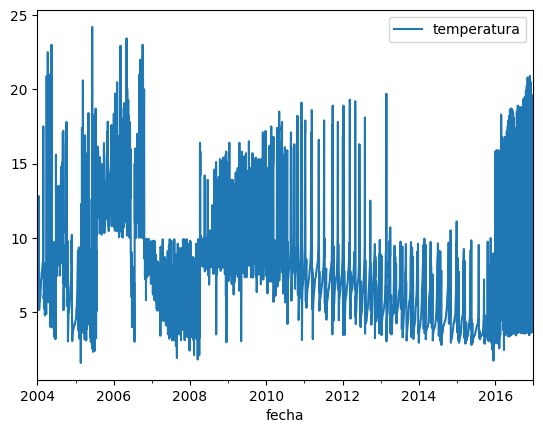

In [26]:
#Lee el archivo CSV.
#'header=0' indica que la primera fila del archivo CSV contiene los nombres de las columnas.
#'parse_dates=[0]' indica que la primera columna debe ser interpretada como fechas.
#'dayfirst=True' especifica que el formato de las fechas es día-mes-año.
#'index_col=0' indica que la primera columna debe ser utilizada como índice del DataFrame.
series = pd.read_csv('TS_d_1.csv', header = 0, parse_dates=[0], dayfirst=True, index_col=0)
series.plot() #Realiza un gráfico de la serie de tiempo

Viendo el gráfico podemos decir que la temperatura media ha ido aumentando y dismunuyendo a lo largo del tiempo. Se puede ver que entre el 2004 y 2006 estuvo subiendo y bajando continuamente, entre 2007 y 2008 se mantuvo abajo, en 2009 volvió a subir un poco y se mantuvo así hasta el 2013 donde bajó y volvió a subir en 2016.

### 1.7

- Agrupe los datos y muestre un gráfico similar al de la seccion 6.4 de las lecturas (Stacked lines plots).  
- ¿Puede hacer algún comentario del comportamiento anual de los datos?

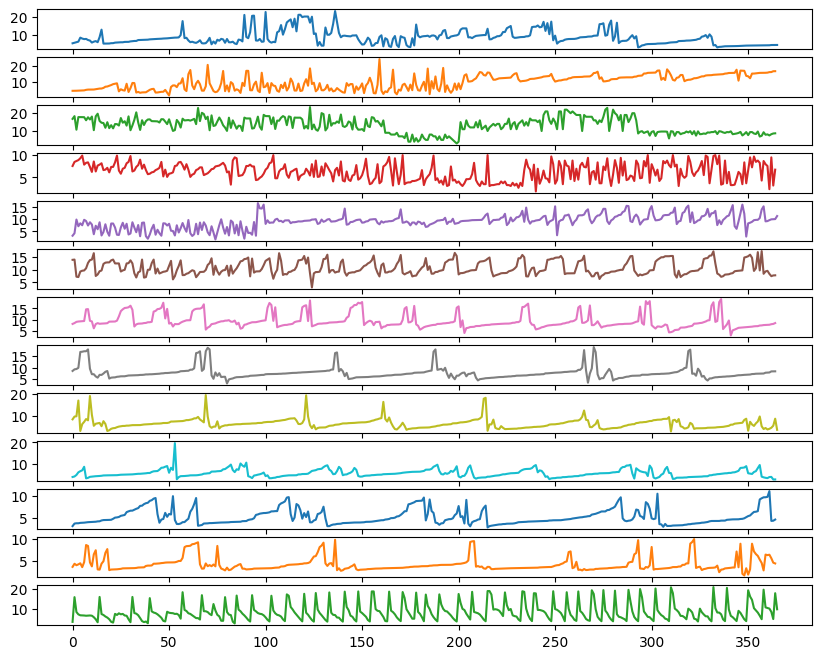

In [27]:
from matplotlib import pyplot 

years = series['temperatura'].groupby(pd.Grouper(freq='A')).apply(list).apply(pd.Series).T #Agrupa la columna 'temperatura' por año
years.plot(subplots=True, legend=False, figsize=(10, 8)) #Realiza un gráfico de las series temporales por año
pyplot.show() #Muestra el gráfico

Se puede notar que con este gráfico es más fácil ver individualmente lo que sucede año con año, en el anterior no se puede observar con tanta exactitud. 
Al igual que en el gráfico anterior se puede ver que la temperatura tiende a subir y bajar continuamente. Podemos ver que en 2007 la temperatura tuvo picos de subida y bajada muy continuos durante todo el año, al igual que en 2016. También se puede notar que del 2010 al 2015 se tiene un comportamiento muy similar donde la temperatura subio, se mantuvo un tiempo largo abajo y volvio a subir por un tiempo corto.

### 1.8
- Muestre el histograma de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


array([[<Axes: title={'center': 'temperatura'}>]], dtype=object)

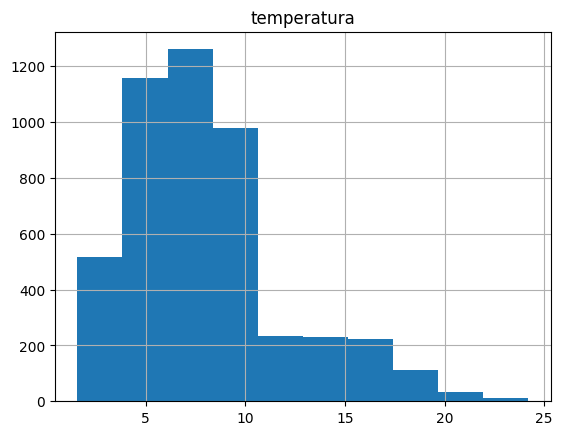

In [28]:
series.hist() #Genera un histograma

Con este histograma podemos ver la frecuencia de ocurrencia de cada temperatura. El eje horizontal representa la temperatura y el eje vertical representa la frecuencia, es decir, el número de veces que se registró cada temperatura. 
Al ver el histograma nos podemos dar cuenta que la temperatura que mas se repite se encuentra entre 5 y 10 grados.

### 1.9
- Muestre el gráfico de densidad de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


<Axes: ylabel='Density'>

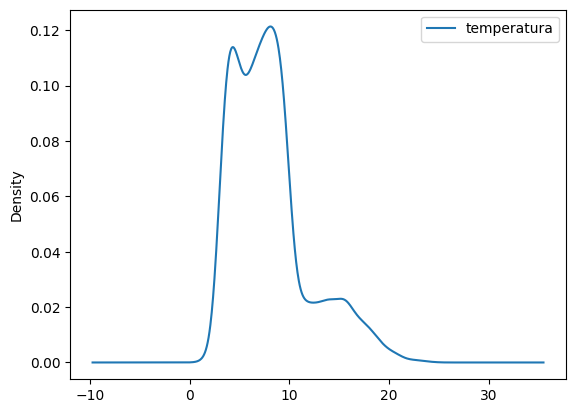

In [29]:
series.plot(kind='kde') #Genera un gráfico de densidad

Al igual que en el histograma podemos ver que la mayor densidad se da maso menos en un rango entre 5 y 10 grados, lo cual indica que ahí se dio la mayor representación.

### 1.10
- Agrupe los datos de la variable serie de manera Anual, y muestre los Boxplot de cada año. 
1. ¿Cómo se interpreta un gráfico Boxplot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?

<Axes: >

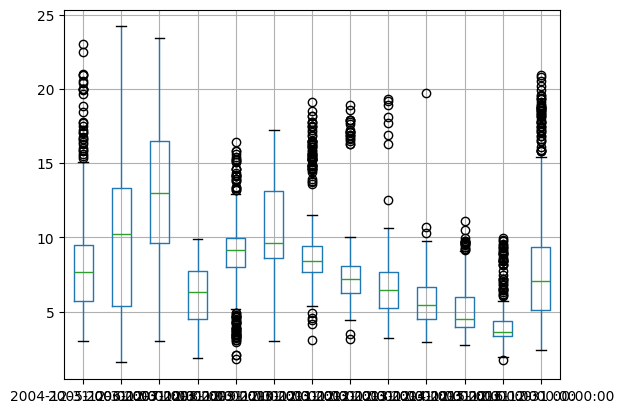

In [30]:
years.boxplot() #Crea un gráfico Boxplot

1. La caja muestra el rango intercuartil y la mediana. Los bigotes indican la dispersión de los datos y los puntos individuales representan valores atípicos.
2. Podemos ver facilmente varias cosas por año como el valor mínimo y el valor máximo de la temperatura, por ejemplo en el 2004 el valor mínimo fue 3 y el máximo fue 15, también que la mediana de todos los años va maso menos desde 4 hasta 13, y que solamente en 2005, 2006, 2007 y 2009 no se presentaron valores atípicos.

### 1.11
- Agrupe los datos de la variable serie de manera Anual, y muestre el Heat Map por año. 
1. ¿Cómo se interpreta un gráfico Heat Map?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


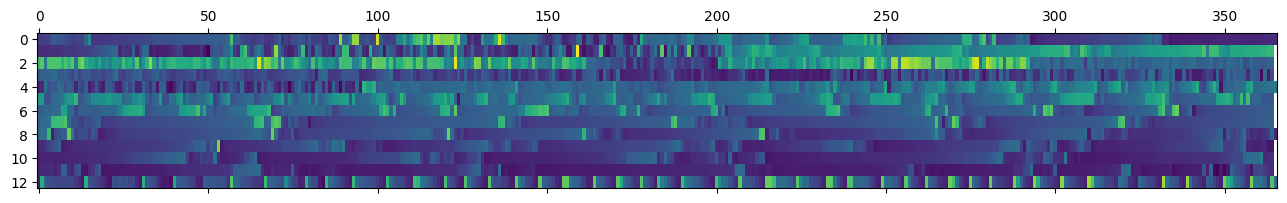

In [31]:
years = years.T #Transpone los datos
pyplot.matshow(years, interpolation = None, aspect = 'auto') #Crea el Heat Map

1. Cada celda en el mapa de calor tiene un color asociado que representa el valor numérico de esa celda. Por lo general, se utiliza una paleta de colores donde los tonos más oscuros representan valores bajos y los tonos más claros representan valores altos.
2. Con este mapa podemos ver, representado con colores, como se comportó la temperatura durante los 365 días del año de los 13 años que nos brinda el archivo CSV. Podemos ver que en el año número 2, el cual es 2006, estuvo calído hasta maso menos el día 150 donde bajó la temperatura unos 50 días y luego volvió a subir. También se puede notar facilmente que los años 9, 10 y 11 (2013, 2014 y 2015) tuvieron en su mayoría temperaturas bajas. Y viendo todos los años en conjunto podemos ver que en su mayoría hubieron temperaturas bajas ya que el color que predomina es el azul y tonos similares.

### 1.12
- Muestre el Lag Scatter plot de la variable series. 
1. ¿Cómo se interpreta un Lag Scatter plot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

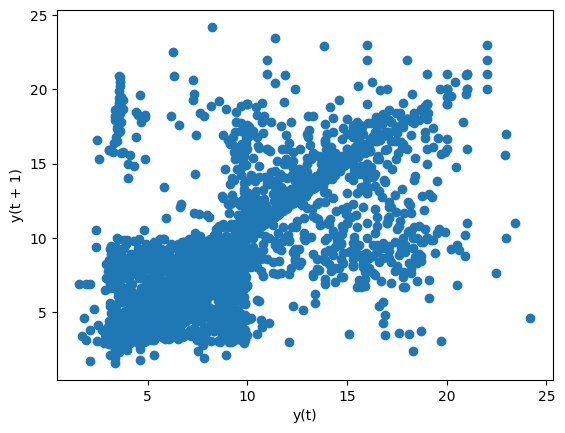

In [32]:
from pandas.plotting import lag_plot #Importación de libreria para generar el gráfico

lag_plot(series) #Genera un Lag Plot

1. Debemos observar la dirección y la fuerza de la relación entre las dos variables. Si los puntos de datos se agrupan en una línea diagonal, hay una relación lineal entre las dos variables. Si los puntos de datos se agrupan en una curva, hay una relación no lineal entre las dos variables.
2. Se puede notar que la temperatura tiene una tendendia a subir porque los puntos se agrupan en una linea diagonal con pendiente positiva pero no es perfecta, hay puntos dispersos alrededor lo que indica cierta variabilidad. Se destacan mayor dispersión de puntos entre los 5 y 10 grados, algo que ya habíamos podido notar y destacar con los gráficos anteriores. 

### 1.13
- Muestre el gráfico Autocorrelación de la variable series. 
1. ¿Cómo se interpreta este tipo de gráficos?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

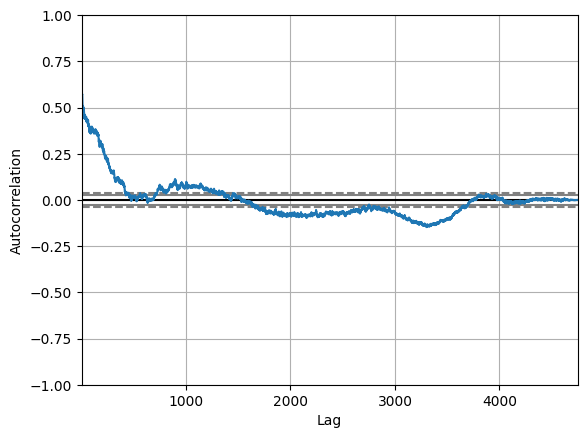

In [33]:
from pandas.plotting import autocorrelation_plot #Importación de libreria para generar el gráfico

autocorrelation_plot(series) #Crea el gráfico de autocorrelación


1. El eje horizontal muestra los rezagos (lags) y el eje vertical representa el coeficiente de correlación, que varía entre -1 y 1. Los picos en el gráfico indican correlaciones entre los valores en diferentes momentos del tiempo. Los patrones de picos y valles pueden revelar información sobre la estructura temporal de los datos. El signo de un número de correlación indica si la relación entre dos variables es positiva o negativa. Una correlación positiva significa que las dos variables tienden a moverse en la misma dirección, mientras que una correlación negativa significa que las dos variables tienden a moverse en direcciones opuestas.
2. Se puede notar que al inicio tiene una autocorrelación positiva pero despues baja y se queda en cero y poco mas arriba pero luego empieza a bajar estando entre 0 y -0.25, lo cual indica que fue negativa pero luego al final se mantiene estable en 0. Se podría decir que hay poca relación entre las variables. 

# Parte 2.  Diferenciación  (15 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie el capítulo 15. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'TS_d_2.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 2.1
- Cargue el archivo proporcionado y muestre los 10 primeros registros.

In [34]:
import pandas 

tabla = pandas.read_csv('TS_d_2.csv')

#Traer el numero indicado de registros - 10
primerosRegistros = tabla.head(10)

#Imprimirlos
print(primerosRegistros)

       fecha  humedad
0   1/1/2000     0.89
1   1/2/2000     0.86
2   1/3/2000     0.89
3   1/4/2000     0.83
4   1/5/2000     0.83
5   1/6/2000     0.85
6   1/7/2000     0.95
7   1/8/2000     0.89
8   1/9/2000     0.82
9  1/10/2000     0.72


### 2.2

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

In [35]:
from statsmodels.tsa.stattools import adfuller

#Se aplica el Augmented DIckey-FUller test
adf_total = adfuller(df['humedad'], autolag='AIC')

#Extraer el resultado en la posicion 1
valor_p = adf_total[1]

#Verificar si es estacionaria o no utilizando el threshold del 0.05
if valor_p <= 0.05:
    print("La serie temporal ES estacionaria (se rechaza la hipotesis nula)")
else:
    print("La serie temporal NO es estacionaria (no se puede rechazar la hipotesis nula)")

#Imprimir los resultados
print("Estadisticas del ADF:", adf_total)

""" Explicacion de resultados

Dado que el valor p (-6.06999) es inferior a 0.05 (que es el nivel de significancia 
del 5%), podemos concluir que podemos descartar la hipótesis nula. En resumen, 
esto implica que con un 95% de confianza estadística, los datos contenidos en el 
archivo 'TS_d_2.csv' se consideran estacionarios ya que estos datos carecen de una 
raíz unitaria y son apropiados para llevar a cabo un análisis de series de tiempo. """

NameError: name 'df' is not defined

### 2.3

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

In [ ]:
import pandas as pnd
from statsmodels.tsa.stattools import adfuller

#Cargar el archivo CSV
series = pnd.read_csv('TS_d_2.csv', header=0)

#Se extrae la columna de la serie temporal
serie_temporal = series['humedad']

#Diferenciación de la serie
diferenciada = serie_temporal.diff().dropna()

#Se pasa el resultado a float
diferenciada = diferenciada.astype(float)

#Se le aplica el Augmented Dickey-FUller test
resultados_adf_diferenciada = adfuller(diferenciada, autolag='AIC')

#Se extraen los resultados importantes 0,1,4
estadisticas_adf_diferenciada = resultados_adf_diferenciada[0]
p_valor = resultados_adf_diferenciada[1]
valores_críticos = resultados_adf_diferenciada[4]

#Imprimir los resultados
print("Estadísticas ADF después de la diferenciación:")
print("\n")
print(f"Estadísticas ADF: {estadisticas_adf_diferenciada}")
print(f"P-valor: {p_valor}")
print("Valores críticos:")
for key, value in valores_críticos.items():
    print(f"\t{key}: {value}")

'''
Explicacion de los resultados:
Después de aplicar la diferenciación a la serie temporal, los resultados del 
test de Dickey-Fuller Aumentado son altamente significativos. El valor 
negativo de la estadística ADF y el p-valor extremadamente pequeño (8.166131371726284e-10) 
indican que la serie se ha vuelto estacionaria. Además, al comparar la estadística ADF con 
los valores críticos, se confirma que la serie es estacionaria.

'''

Estadísticas ADF después de la diferenciación:


Estadísticas ADF: -6.981581311995562
P-valor: 8.166131371726284e-10
Valores críticos:
	1%: -3.460018927623594
	5%: -2.8745897386146817
	10%: -2.57372514086348


'\nLos resultados del Augmented Dickey-Fuller (ADF) test después de aplicar la diferenciación \na la serie temporal son altamente significativos. El ADF Statistic es un valor negativo \nconsiderable, lo que sugiere que la serie se ha vuelto estacionaria después de la \ndiferenciación. El p-valor es extremadamente pequeño (8.166131371726284e-10), lo que indica\nuna fuerte evidencia en contra de la hipótesis nula de que la serie es no estacionaria. \nAdemás, al comparar el ADF Statistic con los valores críticos, vemos que es mucho menor \nque los valores críticos del 1%, 5% y 10%, lo que refuerza la conclusión de que la serie \nes estacionaria.\n'

### 2.4

- ¿Esta serie requería Diferenciación o no?  Explique el gráfico generado, ¿por qué sé mira así relacionado con la necesidad o no de diferenciación?

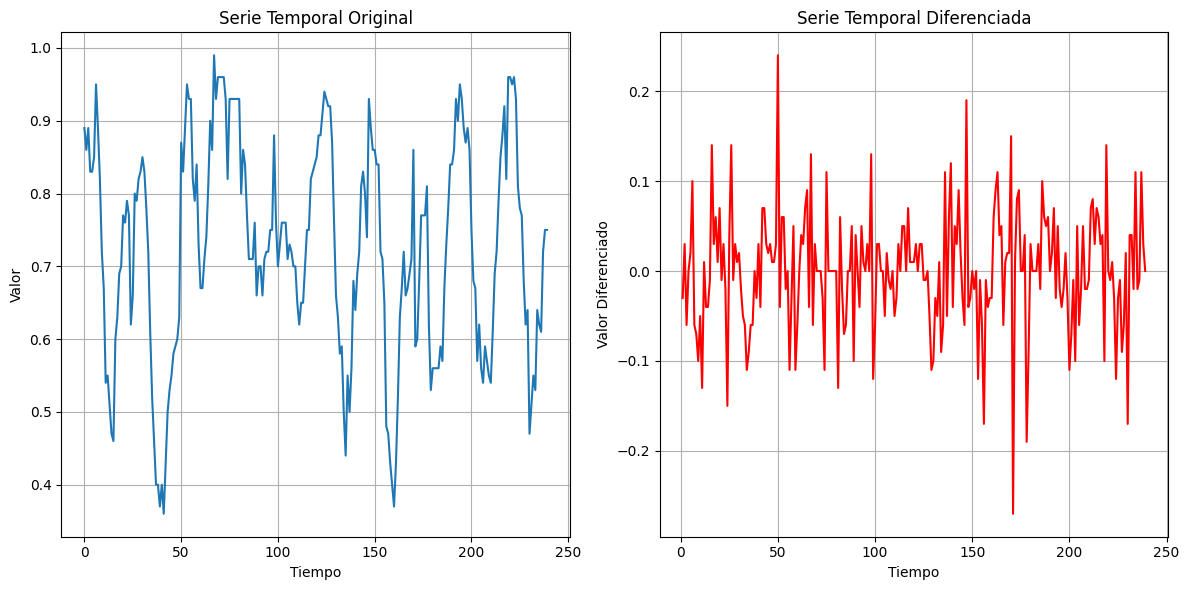

'\nLa serie requería diferenciación, como se evidencia en el gráfico generado. La serie original \nmostraba una tendencia creciente y patrones estacionales, lo que indicaba no estacionariedad. \nSin embargo, después de la diferenciación, la tendencia y la estacionalidad disminuyeron, lo \nque sugiere que la serie se volvió más estacionaria, facilitando el análisis y la modelización \nde datos de humedad. La diferenciación fue necesaria para reducir estos patrones y hacer que \nla serie fuera adecuada para aplicar modelos de series temporales y realizar predicciones.\n'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
datos = pd.read_csv('TS_d_2.csv', header=0, parse_dates=[0])

# Extraer la columna de la serie temporal (serieTemp)
serieTemp = datos['humedad']

# Realizar la diferenciación de la serie
serieDif = serieTemp.diff().dropna()

# Ajustar el tamaño de la figura y crear subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Trazar la serie temporal original en el segundo subplot
axs[0].plot(serieTemp)
axs[0].set_title('Serie temporal original')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Valor')
axs[0].grid(True)

# Trazar la serie diferenciada en el primer subplot
axs[1].plot(serieDif, color='red')
axs[1].set_title('Serie temporal diferenciada')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Valor diferenciado')
axs[1].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

'''
Explicacion de los resultados:
La serie presentaba indicios de no estacionariedad, como lo demuestra el gráfico generado. 
Inicialmente, la serie exhibía una tendencia creciente y patrones estacionales evidentes. 
Sin embargo, tras la aplicación de la diferenciación, se observó una disminución en la tendencia 
y la estacionalidad. Esto sugiere que la serie se volvió más estacionaria, lo que simplificó el 
proceso de análisis y modelización de los datos de humedad. La diferenciación resultó esencial 
para mitigar estos patrones y preparar la serie para la aplicación de modelos de series temporales 
y la realización de predicciones.
'''

### 2.5

- ¿Esta serie requería Diferenciación o no?  Explique el gráfico generado, ¿por qué cree que sé mira así?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
datos = pd.read_csv('TS_d_2.csv', header=0, parse_dates=[0])

# Extraer la columna de la serie temporal
serieTemp = datos['humedad']

# Realizar la diferenciación de la serie
serieDif = serieTemp.diff().dropna()

# Ajustar el tamaño de la figura y crear subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Trazar la serie temporal original en el segundo subplot
axs[0].plot(serieTemp)
axs[0].set_title('Serie Temporal Original')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Valor')
axs[0].grid(True)

# Trazar la serie diferenciada en el primer subplot
axs[1].plot(serieDif, color='red')
axs[1].set_title('Serie Temporal Diferenciada')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Valor Diferenciado')
axs[1].grid(True)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

'''
Explicacion de los resultados:
La serie presentaba indicios de no estacionariedad, como lo demuestra el gráfico generado. 
Inicialmente, la serie exhibía una tendencia creciente y patrones estacionales evidentes. 
Sin embargo, tras la aplicación de la diferenciación, se observó una disminución en la tendencia 
y la estacionalidad. Esto sugiere que la serie se volvió más estacionaria, lo que simplificó el 
proceso de análisis y modelización de los datos de humedad. La diferenciación resultó esencial 
para mitigar estos patrones y preparar la serie para la aplicación de modelos de series temporales 
y la realización de predicciones.
'''

# Parte 3.  ARIMA  (20 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Cap_24. Estudie su contenido. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'TS_d_3.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 3.1

- Explique en qué consiste ARIMA.

In [ ]:
""" ARIMA ("Autoregressive Integrated Moving Average"), es un modelo estadístico empleado en el análisis 
de series temporales utilizado con el propósito de anticipar valores futuros. Este modelo tiene tres componentes 
esenciales: el componente autoregresivo (AR), que se vale de datos previos para efectuar proyecciones a futuro; 
el componente de integración (I), que involucra la diferenciación de la serie para lograr su estacionariedad; y 
el componente de media móvil (MA), que emplea errores de predicción pasados. La combinación de estas tres partes 
habilita la modelización y predicción de patrones presentes en series temporales, como tendencias y estacionalidades. 
Los valores de p, d y q son ajustados de acuerdo a las características particulares de la serie temporal en cuestión, 
y ARIMA se emplea en una variada gama de aplicaciones, que abarcan desde pronósticos financieros hasta predicciones climáticas."""

' ARIMA ("Autoregressive Integrated Moving Average"), es un modelo estadístico empleado en el análisis \nde series temporales con el propósito de anticipar valores futuros. Este modelo fusiona tres componentes \nesenciales: el componente autoregresivo (AR), que se vale de datos previos para efectuar proyecciones a futuro; \nel componente de integración (I), que involucra la diferenciación de la serie para lograr su estacionariedad; y \nel componente de media móvil (MA), que emplea errores de predicción pasados. La combinación de estas tres partes \nhabilita la modelización y predicción de patrones presentes en series temporales, como tendencias y estacionalidades. \nLos valores de p, d y q son ajustados de acuerdo a las características particulares de la serie temporal en cuestión, \ny ARIMA se emplea en una variada gama de aplicaciones, que abarcan desde pronósticos financieros hasta predicciones climáticas.'

### 3.2

- Cargue el archivo y use los gráficos que considere prudente para ver cómo se comportan los datos
- Comente sus conclusiones

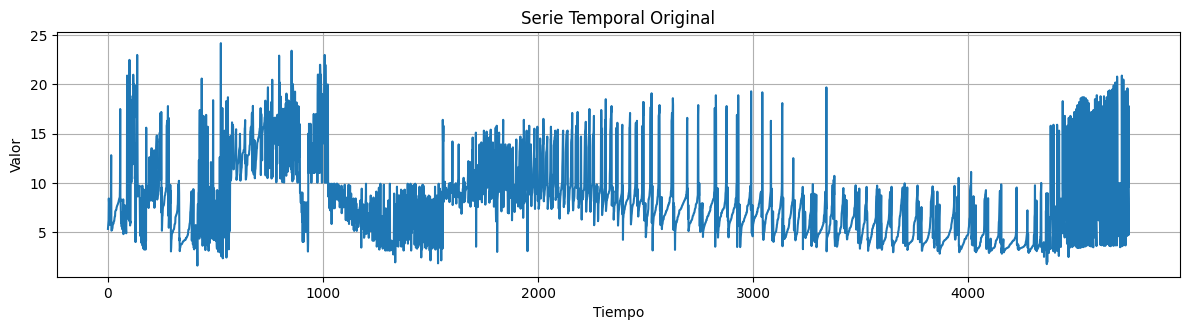

' Se nota que la serie carece de tendencia y patrones estacionales, manteniendo una variabilidad \nconstante, con los datos oscilando en torno a un nivel invariable. En consecuencia, se puede \nafirmar que la serie es estacionaria.'

In [37]:
import pandas as pnd
import matplotlib.pyplot as plt

#Se carga el archivo CSV
series = pnd.read_csv('TS_d_3.csv', header=0, parse_dates=[0])

#Se extrae la columna de la serie temporal
serie_temporal = series['temperatura']

#Ajustar el tamaño de la figura
plt.figure(figsize=(12, 6))

#Trazar la serie temporal original
plt.subplot(2, 1, 1)
plt.plot(serie_temporal)
plt.title('Serie Temporal Original')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)

#Ajustar el espacio entre subtramas
plt.tight_layout()

#Mostrar el gráfico
plt.show()

#Conclusiones
""" La serie carece de tendencia y patrones estacionales, manteniendo una variabilidad 
constante, con los datos oscilando en torno a un nivel invariable. En consecuencia, se puede 
afirmar que la serie es estacionaria."""

### 3.3

- Analice si requiere hacer diferenciación o no. Explique

In [ ]:
#Analisis:
""" Al comportarse de manera estacionaria no sería necesario aplicar diferenciación.
Entonces sí podría aplicar un modelo Arima """

### 3.4

- Haga forecast (similar a las últimas secciones de ese capítulo), con un train de 80% y un test de 20% (no olvide que son series temporales, no datos i.i.d.)

RMSE: 1.4534745374138205


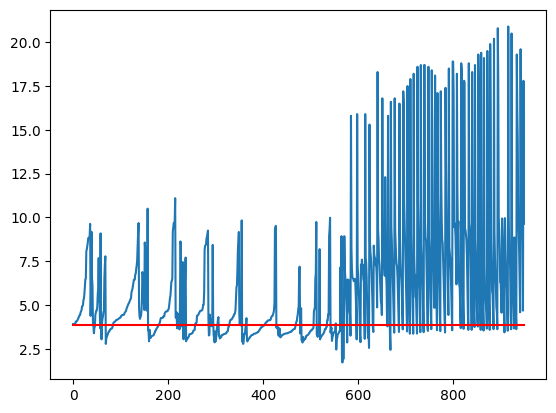

In [41]:
import pandas as pnd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

#Se cargar el archivo CSV
datos = pnd.read_csv('TS_d_3.csv', header=0, parse_dates=[0], index_col=0)

#Extraer la columna de la serie temporal
serieTemp = datos['temperatura']

#Preparar datos para el train y test
X = serieTemp.values

#Se aploca una distribución del 80% para entrenamiento, 20% para prueba
distribution = int(len(X) * 0.8)
train, test = X[0:distribution], X[distribution:len(X)]
historial = [x for x in train]
prediction = list()

#Iterar sobre los datos de prueba y entrenar un modelo ARIMA en cada paso y se realiza una 
#predicción para el siguiente punto en la serie temporal.
for t in range(len(test)):
    modelo = ARIMA(historial, order=(5, 1, 0))
    modelo_entrenado = modelo.fit()
    resultado = modelo_entrenado.forecast()
    yhat = resultado[0]
    prediction.append(yhat)
    observado = test[t]
    #print (f'predicción={yhat}, observado={observado}')

# Cálculo del error (RMSE)
rmse = np.sqrt(np.mean(np.array(test) - np.array(prediction)))
print(f'RMSE: {rmse}')

# Visualización de resultados
plt.plot(test)
plt.plot(prediction, color='red')
plt.show()


### 3.5

- Grafique el predicho versus el real y comente sus conclusiones.

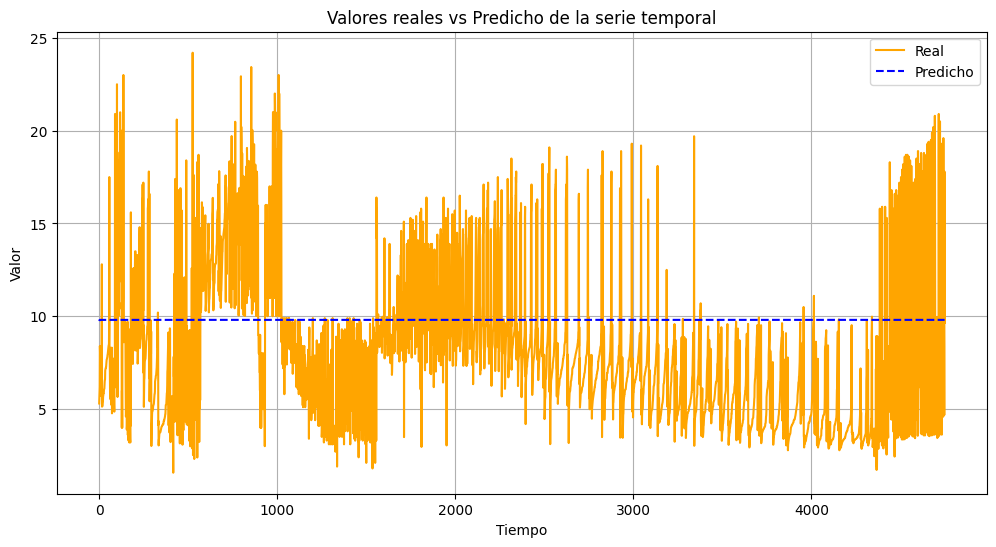

' Conclusiones \nLa evaluación del gráfico que contrasta los valores reales con las predicciones de la serie temporal \napunta hacia limitaciones en la exactitud del modelo ARIMA empleado. Se evidencian diferencias notables \nentre las curvas que representan los valores reales y las predicciones, lo que sugiere una precisión \ninsuficiente en las estimaciones. Además, se identifican cambios abruptos en varios puntos, insinuando \nla incapacidad del modelo para anticipar sucesos inesperados o bruscos cambios en los datos. Por último, \nlas pequeñas oscilaciones alrededor de las líneas de pronóstico indican la presencia de ruido en los datos \nque el modelo no logró eliminar completamente. Estos descubrimientos subrayan la necesidad de revisar y mejorar \nel modelo ARIMA o considerar enfoques alternativos con el fin de lograr predicciones más precisas para esta serie temporal.'

In [44]:
import pandas as pnd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

#Cargar el archivo CSV
series = pnd.read_csv('TS_d_3.csv', header=0, parse_dates=[0])

# Se extrae la columna de la serie temporal
serie_temporal = series['temperatura']

#ajustamos un modelo ARIMA a los datos de train
p, d, q = 1, 1, 1

#Se ajustan estos hiperparámetros según tus datos
model = ARIMA(serie_temporal, order=(p, d, q))
model_fit = model.fit()

#Se pronostican valores en el conjunto del test
forecast = model_fit.forecast(steps=len(serie_temporal))

#Se configura el tamaño de la figura
plt.figure(figsize=(12, 6))

#Se trazan los valores reales vs los pronósticos
plt.plot(np.arange(len(serie_temporal)), serie_temporal, label='Real', color='orange')
plt.plot(np.arange(len(serie_temporal)), forecast, label='Predicho', linestyle='--', color='blue')

plt.title('Valores reales vs Predicho de la serie temporal')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

""" Conclusiones 
La evaluación del gráfico que contrasta los valores reales con las predicciones de la serie temporal 
apunta hacia limitaciones en la exactitud del modelo ARIMA empleado. Se evidencian diferencias notables 
entre las curvas que representan los valores reales y las predicciones, lo que sugiere una precisión 
insuficiente en las estimaciones. Además, se identifican cambios abruptos en varios puntos, insinuando 
la incapacidad del modelo para anticipar sucesos inesperados o bruscos cambios en los datos. Por último, 
las pequeñas oscilaciones alrededor de las líneas de pronóstico indican la presencia de ruido en los datos 
que el modelo no logró eliminar completamente. Estos descubrimientos subrayan la necesidad de revisar y mejorar 
el modelo ARIMA o considerar enfoques alternativos con el fin de lograr predicciones más precisas para esta serie temporal."""